In [2]:
!ls ../experiments/multimodalmodel_wavlmlarge_robertalarge_lazyload_lr1e4_f1loss/results/dev.csv

../experiments/multimodalmodel_wavlmlarge_robertalarge_lazyload_lr1e4_f1loss/results/dev.csv


In [3]:
def get_stratified_subset(df, label_column, num_examples_per_label, random_state=None):
    """
    Returns a stratified subset of the dataframe with a fixed number of examples for each label.

    Args:
        df (pd.DataFrame): The input dataframe.
        label_column (str): The name of the column containing the labels.
        num_examples_per_label (int): The fixed number of examples to sample for each label.
        random_state (int, optional): Random seed for reproducibility.

    Returns:
        pd.DataFrame: A stratified subset of the dataframe.
    """
    if random_state is not None:
        np.random.seed(random_state)

    stratified_subset = []

    for label in df[label_column].unique():
        label_group = df[df[label_column] == label]
        if len(label_group) < num_examples_per_label:
            raise ValueError(f"Not enough examples for label '{label}'. Requested {num_examples_per_label}, but only {len(label_group)} available.")
        
        sampled_group = label_group.sample(n=num_examples_per_label, random_state=random_state)
        stratified_subset.append(sampled_group)

    return pd.concat(stratified_subset).reset_index(drop=True)

In [4]:
import pandas as pd
import numpy as np

In [5]:
preds = pd.read_csv('../experiments/multimodalmodel_wavlmlarge_robertalarge_lazyload_lr1e4_f1loss/results/dev.csv')
preds.head()

,Filename,Prediction,class_0_prob,class_1_prob,class_2_prob,class_3_prob,class_4_prob,class_5_prob,class_6_prob,class_7_prob
0,MSP-PODCAST_0002_0033.wav,N,-52.6033,-41.7721,-43.3939,-5.4312,14.3071,-31.8598,-11.9110,32.9008
1,MSP-PODCAST_0002_0039.wav,N,-59.2877,-55.8558,-27.3856,-13.8903,-3.9151,-53.6279,-27.2203,36.3052
2,MSP-PODCAST_0002_0051.wav,N,-67.0981,-52.1420,-31.8826,-25.1240,-12.8216,-66.7782,-41.5314,45.5945
3,MSP-PODCAST_0002_0061.wav,N,-63.3602,-38.0681,-42.0264,-22.9121,-4.3024,-39.3055,-20.4472,37.9448
4,MSP-PODCAST_0006_0017.wav,N,-72.4728,-33.9537,-47.1411,-33.8080,-13.3345,-63.3057,-44.0271,50.1526


In [6]:
df = pd.read_csv('/workspace/lucas.ueda/interspeech_ser/data/Labels/labels_consensus.csv')
df.head()

,FileName,EmoClass,EmoAct,EmoVal,EmoDom,SpkrID,Gender,Split_Set
0,MSP-PODCAST_0002_0033.wav,N,4.8,4.2,5.4,127,Female,Development
1,MSP-PODCAST_0002_0039.wav,N,4.0,4.2,4.2,127,Female,Development
2,MSP-PODCAST_0002_0051.wav,N,4.0,4.2,4.2,127,Female,Development
3,MSP-PODCAST_0002_0059.wav,X,4.0,3.8,4.0,128,Female,Development
4,MSP-PODCAST_0002_0061.wav,F,3.4,2.8,4.2,128,Female,Development


In [7]:
preds['FileName'] = preds['Filename']
preds = preds.merge(df[['FileName','EmoClass','Gender','SpkrID']], how='left', on = 'FileName')

In [8]:
preds['EmoClass'].isnull().sum()

0

In [9]:
preds.head()

,Filename,Prediction,class_0_prob,class_1_prob,class_2_prob,class_3_prob,class_4_prob,class_5_prob,class_6_prob,class_7_prob,FileName,EmoClass,Gender,SpkrID
0,MSP-PODCAST_0002_0033.wav,N,-52.6033,-41.7721,-43.3939,-5.4312,14.3071,-31.8598,-11.9110,32.9008,MSP-PODCAST_0002_0033.wav,N,Female,127
1,MSP-PODCAST_0002_0039.wav,N,-59.2877,-55.8558,-27.3856,-13.8903,-3.9151,-53.6279,-27.2203,36.3052,MSP-PODCAST_0002_0039.wav,N,Female,127
2,MSP-PODCAST_0002_0051.wav,N,-67.0981,-52.1420,-31.8826,-25.1240,-12.8216,-66.7782,-41.5314,45.5945,MSP-PODCAST_0002_0051.wav,N,Female,127
3,MSP-PODCAST_0002_0061.wav,N,-63.3602,-38.0681,-42.0264,-22.9121,-4.3024,-39.3055,-20.4472,37.9448,MSP-PODCAST_0002_0061.wav,F,Female,128
4,MSP-PODCAST_0006_0017.wav,N,-72.4728,-33.9537,-47.1411,-33.8080,-13.3345,-63.3057,-44.0271,50.1526,MSP-PODCAST_0006_0017.wav,N,Female,127


In [10]:
# !pip install matplotlib

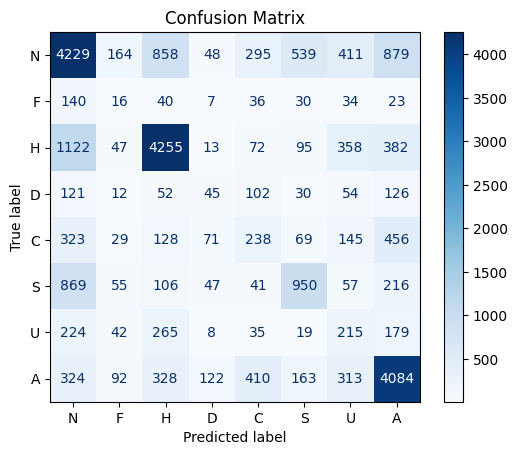

In [11]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(preds['EmoClass'], preds['Prediction'], labels=preds['EmoClass'].unique())

# Display labels
labels = preds['EmoClass'].unique()

# Visualize confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
cmd.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [12]:
preds_subset = get_stratified_subset(preds, 'EmoClass', 100)
preds_subset.head()

,Filename,Prediction,class_0_prob,class_1_prob,class_2_prob,class_3_prob,class_4_prob,class_5_prob,class_6_prob,class_7_prob,FileName,EmoClass,Gender,SpkrID
0,MSP-PODCAST_3492_0180.wav,N,-65.7178,-36.4345,-53.2096,-25.5185,-0.7702,-52.5576,-30.7011,50.5438,MSP-PODCAST_3492_0180.wav,N,Female,2035
1,MSP-PODCAST_2885_0997.wav,H,-23.4392,-21.0132,4.8106,-47.6331,-44.4440,-49.7515,-41.3807,-3.4739,MSP-PODCAST_2885_0997.wav,N,Male,1651
2,MSP-PODCAST_3299_0821.wav,N,-50.1647,-55.5396,-9.5646,-24.8083,-22.0891,-60.3195,-36.7257,30.5071,MSP-PODCAST_3299_0821.wav,N,Male,2071
3,MSP-PODCAST_3787_0145.wav,N,-51.7209,-41.3269,-26.1384,-31.1145,-16.6766,-70.6344,-47.9583,40.5039,MSP-PODCAST_3787_0145.wav,N,Female,1987
4,MSP-PODCAST_4265_1107.wav,A,14.3129,-42.3113,3.8499,-28.9122,-43.4407,-51.4546,-41.0338,-42.9898,MSP-PODCAST_4265_1107.wav,N,Male,2027


In [13]:
# Average F1-score using bootstrap
f1_scores = []
for i in range(100):
    preds_subset = get_stratified_subset(preds, 'EmoClass', 200, i)
    f1_scores.append(f1_score(preds_subset['EmoClass'], preds_subset['Prediction'], average='macro'))

In [14]:
f1_scores = np.array(f1_scores)

np.mean(f1_scores), np.std(f1_scores),np.max(f1_scores),np.min(f1_scores)

(0.3174918993128053,
 0.009198400844398918,
 0.33677894548994963,
 0.2833880251045267)

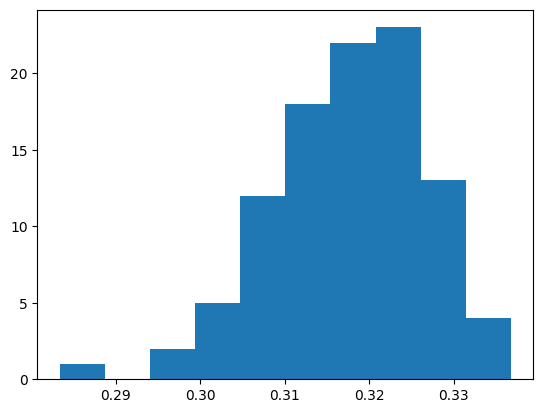

In [15]:
plt.hist(f1_scores, bins=10)
plt.show()

In [16]:
f1_score(preds['EmoClass'], preds['Prediction'], average='macro')

0.35797978187591795

In [17]:
f1_score(preds['EmoClass'], preds['Prediction'], average='micro')

0.555546757462982

In [18]:
accuracy_score(preds['EmoClass'], preds['Prediction'])

0.555546757462982

In [19]:
preds['PRED_dumb'] = 'N'
f1_score(preds['EmoClass'], preds['PRED_dumb'], average='macro'), accuracy_score(preds['EmoClass'], preds['PRED_dumb'])

(0.05678375814693552, 0.2938870852799113)

In [20]:
preds['EmoClass'].value_counts()

EmoClass
N    7423
H    6344
A    5836
S    2341
C    1459
U     987
D     542
F     326
Name: count, dtype: int64

In [20]:
preds.head(2)

,Filename,Prediction,class_0_prob,class_1_prob,class_2_prob,class_3_prob,class_4_prob,class_5_prob,class_6_prob,class_7_prob,FileName,EmoClass,Gender,SpkrID,PRED_dumb
0,MSP-PODCAST_0002_0033.wav,U,0.0667,-1.1496,0.1450,1.6414,-2.0751,-2.7755,-1.3496,0.7182,MSP-PODCAST_0002_0033.wav,N,Female,127,N
1,MSP-PODCAST_0002_0039.wav,N,-2.3037,-1.0926,0.4029,-0.4167,-0.3963,-2.1733,-0.1999,1.1052,MSP-PODCAST_0002_0039.wav,N,Female,127,N


In [21]:
f1_score(preds[preds['Gender']=='Female']['EmoClass'], preds[preds['Gender']=='Female']['Prediction'], average='macro')

0.32761798126151165

In [22]:
f1_score(preds[preds['Gender']=='Male']['EmoClass'], preds[preds['Gender']=='Male']['Prediction'], average='macro')

0.3816636067260863

In [23]:
accuracy_score(preds[preds['Gender']=='Female']['EmoClass'], preds[preds['Gender']=='Female']['Prediction'])

0.42292142731587273

In [24]:
accuracy_score(preds[preds['Gender']=='Male']['EmoClass'], preds[preds['Gender']=='Male']['Prediction'])

0.5427233429394812

In [25]:
for e in preds['EmoClass'].unique():
    acc = accuracy_score(preds[preds['EmoClass']==e]['EmoClass'], preds[preds['EmoClass']==e]['Prediction'])
    print(f'Emotion {e} acc = {acc}')

Emotion N acc = 0.3716826081099286
Emotion F acc = 0.147239263803681
Emotion H acc = 0.5829129886506935
Emotion D acc = 0.31365313653136534
Emotion C acc = 0.24400274160383825
Emotion S acc = 0.5540367364374199
Emotion U acc = 0.3282674772036474
Emotion A acc = 0.6327964359150103


In [26]:
preds.groupby('SpkrID').agg({'Gender': 'count'}).reset_index().sort_values(by='Gender', ascending= False).head(10)

,SpkrID,Gender
17,210,3400
5,97,1371
610,2789,1135
4,54,444
281,2027,390
611,2794,353
623,2951,347
15,169,347
0,26,312
13,149,296


In [27]:
top10_volumetry_spks = preds.groupby('SpkrID').agg({'Gender': 'count'}).reset_index().sort_values(by='Gender', ascending= False).head(10).SpkrID

In [28]:
for spk in top10_volumetry_spks:
    emotions_spk = preds[preds['SpkrID']==spk]['EmoClass'].unique()
    gender = preds[preds['SpkrID']==spk]['Gender'].values[0]
    acc = accuracy_score(preds[preds['SpkrID']==spk]['EmoClass'], preds[preds['SpkrID']==spk]['Prediction'])
    f1_ = f1_score(preds[preds['SpkrID']==spk]['EmoClass'], preds[preds['SpkrID']==spk]['Prediction'], average='macro')
    print(f'Spk {spk} (Gender = {gender}) has emotions = {emotions_spk} with acc = {acc} f1-macro = {f1_}')

Spk 210 (Gender = Female) has emotions = ['F' 'S' 'N' 'D' 'C' 'A' 'U' 'H'] with acc = 0.2938235294117647 f1-macro = 0.20224061699133744
Spk 97 (Gender = Male) has emotions = ['H' 'C' 'N' 'D' 'U' 'A' 'F' 'S'] with acc = 0.4390955506929249 f1-macro = 0.2950157153418447
Spk 2789 (Gender = Male) has emotions = ['C' 'A' 'H' 'N' 'S' 'U' 'D'] with acc = 0.8440528634361234 f1-macro = 0.2458113720016268
Spk 54 (Gender = Male) has emotions = ['H' 'N' 'D' 'C' 'A' 'F' 'U'] with acc = 0.47297297297297297 f1-macro = 0.23462587291517012
Spk 2027 (Gender = Male) has emotions = ['A' 'C' 'N' 'H' 'S' 'U' 'D'] with acc = 0.6897435897435897 f1-macro = 0.2296289217272945
Spk 2794 (Gender = Male) has emotions = ['H' 'S' 'N' 'A' 'U'] with acc = 0.6628895184135978 f1-macro = 0.305663018898313
Spk 2951 (Gender = Male) has emotions = ['H' 'N' 'A' 'S' 'C' 'U'] with acc = 0.7492795389048992 f1-macro = 0.3278552429950663
Spk 169 (Gender = Male) has emotions = ['H' 'N' 'C' 'A' 'U' 'S' 'D' 'F'] with acc = 0.328530259

In [29]:
for spk in top10_volumetry_spks:
    df_filt = preds[preds['SpkrID']==spk]
    gender = df_filt.Gender.values[0]
    for e in df_filt['EmoClass'].unique():
        acc = accuracy_score(df_filt[df_filt['EmoClass']==e]['EmoClass'], df_filt[df_filt['EmoClass']==e]['Prediction'])
        print(f'SPK {spk} (gender = {gender}) in emotion {e} acc = {acc}')

SPK 210 (gender = Female) in emotion F acc = 0.05303030303030303
SPK 210 (gender = Female) in emotion S acc = 0.4094488188976378
SPK 210 (gender = Female) in emotion N acc = 0.10555555555555556
SPK 210 (gender = Female) in emotion D acc = 0.29069767441860467
SPK 210 (gender = Female) in emotion C acc = 0.0931174089068826
SPK 210 (gender = Female) in emotion A acc = 0.6025267249757046
SPK 210 (gender = Female) in emotion U acc = 0.12195121951219512
SPK 210 (gender = Female) in emotion H acc = 0.33783783783783783
SPK 97 (gender = Male) in emotion H acc = 0.68
SPK 97 (gender = Male) in emotion C acc = 0.37606837606837606
SPK 97 (gender = Male) in emotion N acc = 0.21067415730337077
SPK 97 (gender = Male) in emotion D acc = 0.38666666666666666
SPK 97 (gender = Male) in emotion U acc = 0.31654676258992803
SPK 97 (gender = Male) in emotion A acc = 0.37362637362637363
SPK 97 (gender = Male) in emotion F acc = 0.027777777777777776
SPK 97 (gender = Male) in emotion S acc = 0.14285714285714285
S

# Dimensional

In [30]:
!ls ../benchmark/model/dim_ser/7/results

dev.csv  test3.csv


In [27]:
preds = pd.read_csv('../benchmark/model/dim_ser/7/results/dev.csv')
preds.head()

,FileName,EmoAct,EmoVal,EmoDom
0,MSP-PODCAST_0002_0033.wav,4.110488,3.377474,4.107728
1,MSP-PODCAST_0002_0039.wav,4.309968,3.705411,4.469491
2,MSP-PODCAST_0002_0051.wav,3.757301,4.351225,4.176206
3,MSP-PODCAST_0002_0059.wav,4.127300,3.831695,4.195695
4,MSP-PODCAST_0002_0061.wav,4.053204,3.987261,4.183712


In [28]:
df = pd.read_csv('/workspace/lucas.ueda/interspeech_ser/data/Labels/labels_consensus.csv')
df.head(2)

,FileName,EmoClass,EmoAct,EmoVal,EmoDom,SpkrID,Gender,Split_Set
0,MSP-PODCAST_0002_0033.wav,N,4.8,4.2,5.4,127,Female,Development
1,MSP-PODCAST_0002_0039.wav,N,4.0,4.2,4.2,127,Female,Development


In [47]:
preds = preds.merge(df[['FileName','EmoAct','EmoVal','EmoDom']], how='left', on = 'FileName')

In [49]:
preds.head(2)

,FileName,EmoAct_x,EmoVal_x,EmoDom_x,EmoAct_y,EmoVal_y,EmoDom_y
0,MSP-PODCAST_0002_0033.wav,4.110488,3.377474,4.107728,4.8,4.2,5.4
1,MSP-PODCAST_0002_0039.wav,4.309968,3.705411,4.469491,4.0,4.2,4.2


In [48]:
import torch
def CCC_loss(pred, lab, m_lab=None, v_lab=None, is_numpy=True):
    """
    pred: (N, 3)
    lab: (N, 3)
    """
    if is_numpy:
        pred = torch.Tensor(pred).float()
        lab = torch.Tensor(lab).float()
    
    m_pred = torch.mean(pred, 0, keepdim=True)
    m_lab = torch.mean(lab, 0, keepdim=True)

    d_pred = pred - m_pred
    d_lab = lab - m_lab

    v_pred = torch.var(pred, 0, unbiased=False)
    v_lab = torch.var(lab, 0, unbiased=False)

    corr = torch.sum(d_pred * d_lab, 0) / (torch.sqrt(torch.sum(d_pred ** 2, 0)) * torch.sqrt(torch.sum(d_lab ** 2, 0)))

    s_pred = torch.std(pred, 0, unbiased=False)
    s_lab = torch.std(lab, 0, unbiased=False)

    ccc = (2*corr*s_pred*s_lab) / (v_pred + v_lab + (m_pred[0]-m_lab[0])**2)    
    return ccc

In [54]:
CCC_loss(preds[['EmoAct_x','EmoVal_x','EmoDom_x']].values,preds[['EmoAct_y','EmoVal_y','EmoDom_y']].values)

tensor([0.6949, 0.7050, 0.6312])

In [55]:
preds['EmoAct_d'] = preds['EmoAct_y'].mean() 
preds['EmoVal_d'] = preds['EmoVal_y'].mean() 
preds['EmoDom_d'] = preds['EmoDom_y'].mean() 

In [56]:
CCC_loss(preds[['EmoAct_d','EmoVal_d','EmoDom_d']].values,preds[['EmoAct_y','EmoVal_y','EmoDom_y']].values)

tensor([-0., -0., -0.])